 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
#check current working directory
Path.cwd()

WindowsPath('C:/Users/twigi/FTBC/W4_Assignment/pandas-homework')

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_df = pd.read_csv("./Resources/whale_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df = whale_df.dropna()

In [7]:
#sort date index from the oldest to newest (i.e ascending order)
whale_df = whale_df.sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns
algo_df = pd.read_csv("./Resources/algo_returns.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


In [10]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df = algo_df.dropna()

In [12]:
#sort date index from the oldest to newest (i.e ascending order)
algo_df = algo_df.sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv("./Resources/sp500_history.csv", index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [14]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [15]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [16]:
# Fix Data Types
# replace dollar sings $ with blank
sp500_df["Close"] = sp500_df["Close"].str.replace("$","", regex = True)

#cast Close string to float using astype
sp500_df["Close"] = sp500_df["Close"].astype("float")

In [17]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [18]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [19]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns = sp500_daily_returns.rename(columns={"Close":"S&P 500"})

In [20]:
#sort date index from the oldest to the newest
sp500_daily_returns = sp500_daily_returns.sort_index()
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469


## Combine Whale, Algorithmic, and S&P 500 Returns

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_daily_returns = pd.concat([whale_df, algo_df, sp500_daily_returns], axis = "columns", join = "inner")
combined_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [22]:
#rename columns with short name for ease of referencing and neater plot display
combined_daily_returns = combined_daily_returns.rename(columns={"SOROS FUND MANAGEMENT LLC":"Soros",
                                                                "PAULSON & CO.INC. ":"Paulson",
                                                                "TIGER GLOBAL MANAGEMENT LLC":"Tiger",
                                                                "BERKSHIRE HATHAWAY INC":"Berkshire"})
combined_daily_returns.head()                                               

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

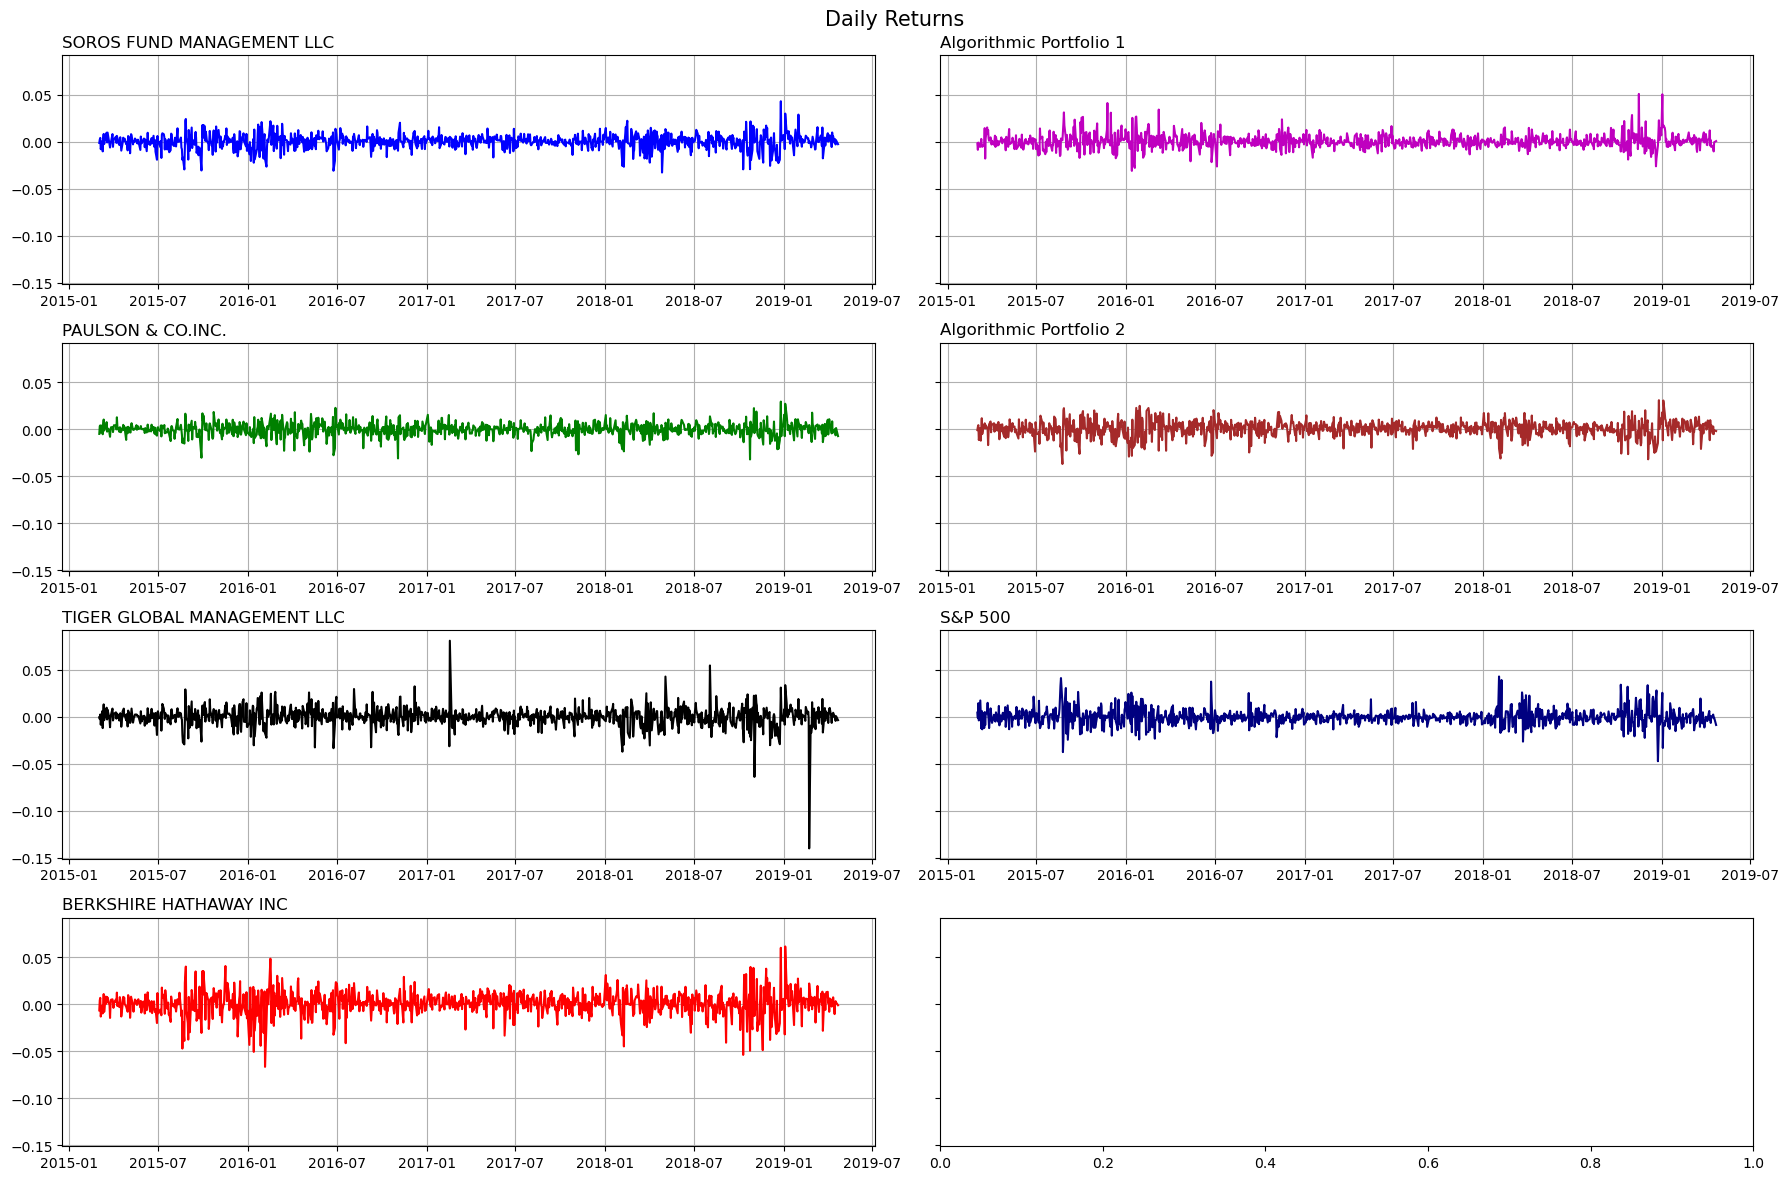

In [23]:
# Plot daily returns of all portfolios
fig, axs = plt.subplots(4,2, sharex = False, sharey = True, figsize=(18,12))

fig.suptitle("Daily Returns", fontsize = 15)

#plot 1
axs[0,0].plot(combined_daily_returns["Soros"], color="b")
axs[0,0].set_title("SOROS FUND MANAGEMENT LLC", loc="left", fontsize = 12)
axs[0,0].grid(True)

#plot 2
axs[1,0].plot(combined_daily_returns["Paulson"], color="g")
axs[1,0].set_title("PAULSON & CO.INC.", loc="left", fontsize = 12)
axs[1,0].grid(True)

#plot 3
axs[2,0].plot(combined_daily_returns["Tiger"], color="k")
axs[2,0].set_title("TIGER GLOBAL MANAGEMENT LLC", loc="left", fontsize = 12)
axs[2,0].grid(True)

#plot 4
axs[3,0].plot(combined_daily_returns["Berkshire"], color="r")
axs[3,0].set_title("BERKSHIRE HATHAWAY INC", loc="left", fontsize = 12)
axs[3,0].grid(True)

#plot 5
axs[0,1].plot(combined_daily_returns["Algo 1"], color="m")
axs[0,1].set_title("Algorithmic Portfolio 1", loc="left", fontsize = 12)
axs[0,1].grid(True)

#plot 6
axs[1,1].plot(combined_daily_returns["Algo 2"], color="brown")
axs[1,1].set_title("Algorithmic Portfolio 2", loc="left", fontsize = 12)
axs[1,1].grid(True)

#plot 7
axs[2,1].plot(combined_daily_returns["S&P 500"], color="navy")
axs[2,1].set_title("S&P 500", loc="left", fontsize = 12)
axs[2,1].grid(True)

fig.tight_layout()
plt.show()

#### Calculate and Plot cumulative returns.

In [24]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_daily_returns).cumprod() - 1
cumulative_returns.tail()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,-0.275171
2019-04-22,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

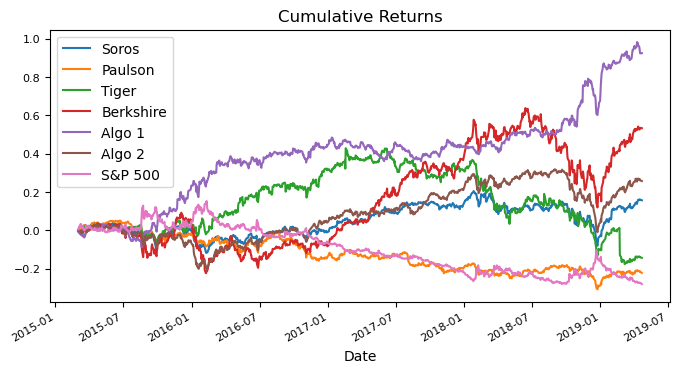

In [25]:
# Plot cumulative returns
cumulative_returns.plot(figsize = (8,4), fontsize = 8, title = "Cumulative Returns")

In [26]:
#determine S&P 500 cumulative return
sp500_return = cumulative_returns.iloc[-1,-1]
sp500_return

-0.28152354721714523

In [27]:
#check any portfolio outperform S&P 500
cumulative_returns.iloc[-1,:] > sp500_return

Soros         True
Paulson       True
Tiger         True
Berkshire     True
Algo 1        True
Algo 2        True
S&P 500      False
Name: 2019-04-22 00:00:00, dtype: bool

All portfolios outperform the S&P 500 for the given investment period 2015-03-03 to 2019-04-22.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot: Daily Returns'}>

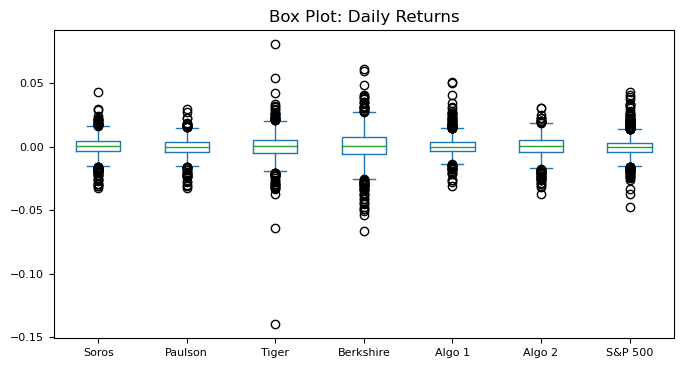

In [28]:
# Box plot to visually show risk
combined_daily_returns.plot.box(figsize = (8,4), fontsize = 8, title ="Box Plot: Daily Returns")

### Calculate Standard Deviations

In [29]:
# Calculate the daily standard deviations of all portfolios
daily_sd = combined_daily_returns.std()
daily_sd.sort_values()

Paulson      0.007026
Algo 1       0.007623
Soros        0.007896
Algo 2       0.008341
S&P 500      0.008587
Tiger        0.010897
Berkshire    0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [30]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_sd = daily_sd["S&P 500"]
sp500_daily_sd

0.00858688974707399

In [31]:
# Determine which portfolios are riskier than the S&P 500
daily_sd.loc[daily_sd.iloc[:] > sp500_daily_sd]

Tiger        0.010897
Berkshire    0.012919
dtype: float64

Tiger Global Management LLC and Berkshire Hathaway portfolios are riskier than the S&P 500.

### Calculate the Annualized Standard Deviation

In [32]:
# Calculate the annualized standard deviation (252 trading days)
ann_sd = daily_sd*np.sqrt(252)
ann_sd.sort_values()

Paulson      0.111527
Algo 1       0.121006
Soros        0.125348
Algo 2       0.132413
S&P 500      0.136313
Tiger        0.172989
Berkshire    0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll21_sd = combined_daily_returns.rolling(window = 21).std()
roll21_sd.tail()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.004302


<AxesSubplot:title={'center':'21-day rolling standard deviation'}, xlabel='Date'>

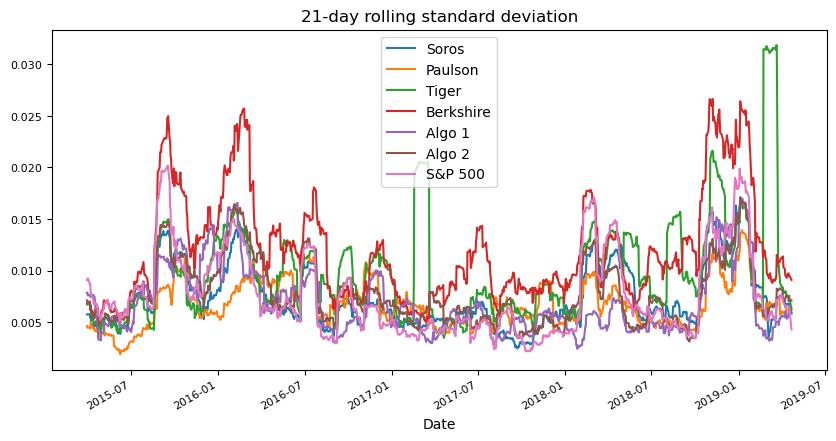

In [34]:
# Plot the rolling standard deviation
roll21_sd.plot(figsize=(10,5), fontsize =8, title="21-day rolling standard deviation", legend = True)

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
correlation = combined_daily_returns.corr()

In [36]:
# Display de correlation matrix
correlation

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Soros,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
Paulson,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
Tiger,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
Berkshire,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

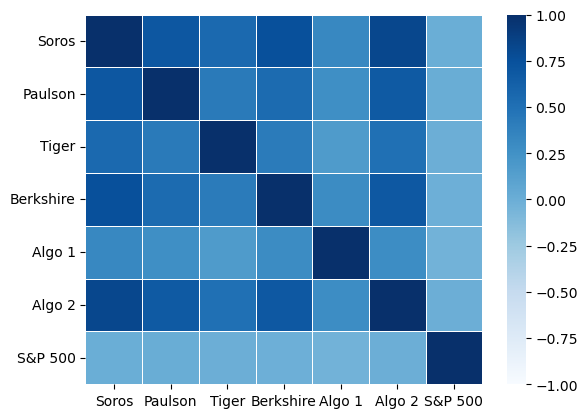

In [37]:
#plot the correlation
sns.heatmap(correlation, vmin = -1, vmax= 1,cmap = "Blues", linewidth =0.5)

#### Determine which portfolio may mimic the S&P 500
* The correlation coefficients between S&P500 and all portfolios are closed to zero. 
* This implies there is no relationship between S&P500 and all portfolios. 
* None of the portfolio may mimic the S&P500 closely.

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Chosen portfolio = Algorithmic Portfolio 1 (i.e. Algo 1)

In [38]:
# Calculate 60d rolling covariance of Algorithmic Portfolio 1
roll60_algo1_sp500_cov = combined_daily_returns["Algo 1"].rolling(window=60).cov(combined_daily_returns["S&P 500"])
roll60_algo1_sp500_cov.tail()

Date
2019-04-15   -0.000005
2019-04-16   -0.000004
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
dtype: float64

In [39]:
# Calculate 60d rolling variance of S&P 500
roll60_sp500_var = combined_daily_returns["S&P 500"].rolling(window=60).var()
roll60_sp500_var.tail()

Date
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P 500, dtype: float64

In [40]:
# Computing 60d-rolling beta
roll60_algo1_beta = roll60_algo1_sp500_cov /roll60_sp500_var
roll60_algo1_beta.tail()

Date
2019-04-15   -0.116546
2019-04-16   -0.102774
2019-04-17   -0.101901
2019-04-18   -0.103039
2019-04-22   -0.113498
dtype: float64

<AxesSubplot:title={'center':'Algorithmic Portfolio 1: Rolling 60-Day Beta'}, xlabel='Date'>

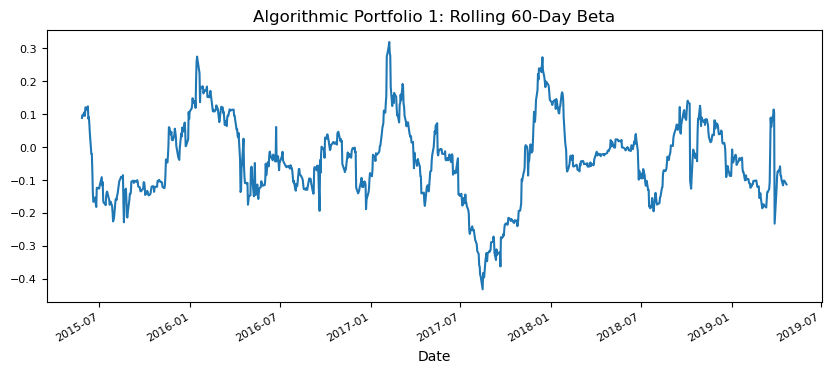

In [41]:
# Plot beta trend
roll60_algo1_beta.plot(figsize = (10,4), fontsize = 8, title = "Algorithmic Portfolio 1: Rolling 60-Day Beta")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [42]:
# Use `ewm` to calculate the rolling window
roll21_sd_ewm = combined_daily_returns.ewm(halflife = 21).std()
roll21_sd_ewm

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475
...,...,...,...,...,...,...,...
2019-04-15,0.007755,0.006960,0.016572,0.012136,0.006880,0.008065,0.007823
2019-04-16,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938,0.007721
2019-04-17,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896,0.007595


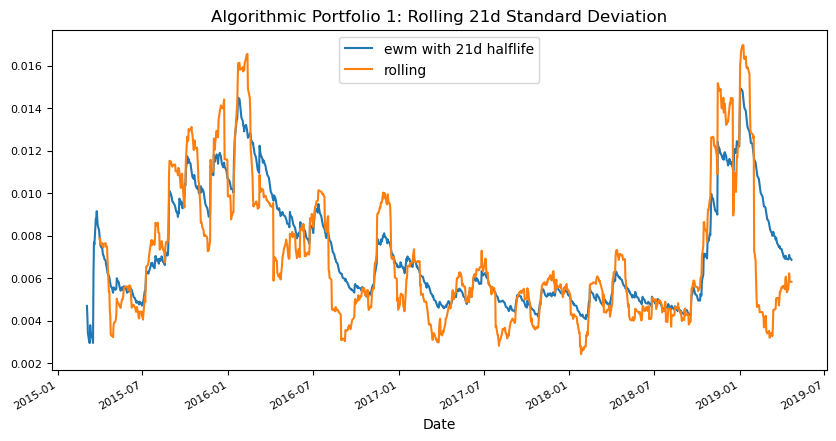

In [43]:
#plot rolling 21d standard deviation calculated using rolling function vs ewm function on the same figure
ax = roll21_sd_ewm["Algo 1"].plot(figsize = (10,5), fontsize = 8 ,title = "Algorithmic Portfolio 1: Rolling 21d Standard Deviation")
roll21_sd["Algo 1"].plot(ax = ax)

#set legend
ax.legend(["ewm with 21d halflife", "rolling"])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Annualized Sharpe Ratios
# sharpe_ratio = (Return(p) - risk free return)/ std_dev
# risk free rate was not provided. Assumption made: risk free rate  = 0 for the analysed period.
# shapre_ratio = Return(p) / std_dev

sharpe_ratios = combined_daily_returns.mean()*252/ ann_sd

In [45]:
sharpe_ratios.sort_values()

S&P 500     -0.518582
Paulson     -0.491422
Tiger       -0.130186
Soros        0.342894
Algo 2       0.484334
Berkshire    0.606743
Algo 1       1.369589
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

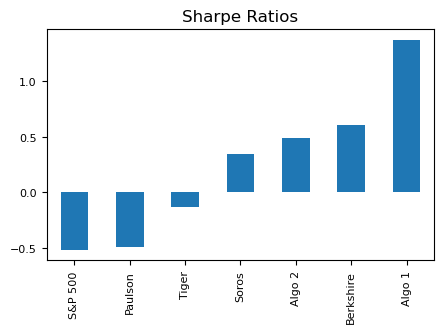

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.sort_values().plot.bar(figsize = (5,3), fontsize = 8, title= "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
**Algorithmic portfolio 1**<br>
**Key observations**<br>
For the investment period (2015-03-03 to 2019-04-22), Algorithmic portfolio 1 is the overall best performer.
* **Return**: It has generated the highest cumulative return of 97% over the 4 years
* **Sharpe ratio**: It has the highest sharpe ratio (1.37). In another word, it has the highest risk adjusted return.
* **Volatilty**: Observed low volatility in its daily returns. 
* **Risk**: It is less riskier than the market (S&P 500) and majority of the whales portfolio with the exception of PAULSON & CO.INC.<br>

For period 2015-03-03 to 2019-04-22, Algorithmic portfolio 1 has outperformed both the market (S&P 500) and the whales portfolio. 

**Algorithmic portfolio 2**<br>
**Key observations**<br>
For the investment period (2015-03-03 to 2019-04-22), Algorithmic portfolio 2 has been a solid performer.
* **Return**: It has generated a cumulative return of 25% over the 4 years. Although the return is lower than Berkshire Hathaway portfolio, it is higher than other whales portfolios and the market (S&P 500).
* **Sharpe ratio**: Algorithmic portfolio 2 has a sharpe ratio of 0.48. This is lower than Berkshire Hathaway portfolio (0.60) but higher than other whales portfolios and the market (S&P 500).
* **Volatility**: The volatility observed in algorithmic portfolio 2 returns is relative similar to the market (S&P 500).
* **Risk**: The risk inherent in algorithmic portfolio 2 is relative similar to the market (S&P 500). It is slightly riskier than Soros Fund Management LLC and Paulson & Co.Inc. portfolios and less risker when compared to Tiger Global Management LLC  and Berkshire Hathaway portfolios.

For the period 2015-03-03 to 2019-04-22, Algorithmic portfolio 2 has underperformed when compared to Berkshire Hathaway portfolio but has outperformed the market (S&P 500) and other whales portfolios namely Soros Fund Managmenet LLC, Paulson & Co.Inc. and Tiger Global Management LLC.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [47]:
# Reading McDonald Closing Price (1st stock)
mcd_df = pd.read_csv('./Resources/mcd_historical.csv',index_col ="Date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
mcd_df.head()

,MCD
Date,
2015-03-02 16:00:00,100.00
2015-03-03 16:00:00,99.74
2015-03-04 16:00:00,100.25
2015-03-05 16:00:00,99.11
2015-03-06 16:00:00,97.13


In [48]:
# Reading BHP Closing Price (2nd stock)
bhp_df = pd.read_csv('./Resources/bhp_historical.csv',index_col = "Date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
bhp_df.head()

,BHP
Date,
2015-03-02 16:00:00,43.71
2015-03-03 16:00:00,43.46
2015-03-04 16:00:00,43.15
2015-03-05 16:00:00,42.57
2015-03-06 16:00:00,41.25


In [49]:
# Reading Pfizer Closing Price (3rd stock)
pfe_df = pd.read_csv('./Resources/pfe_historical.csv',index_col = "Date", dayfirst = True, parse_dates = True, infer_datetime_format = True)
pfe_df.head()

,PFE
Date,
2015-03-02 16:00:00,32.94
2015-03-03 16:00:00,32.74
2015-03-04 16:00:00,32.82
2015-03-05 16:00:00,32.65
2015-03-06 16:00:00,32.18


In [50]:
# Combine all stocks in a single DataFrame
custom_df = pd.concat([mcd_df, bhp_df, pfe_df], axis = "columns", join = "inner")
custom_df.head()

,MCD,BHP,PFE
Date,,,
2015-03-02 16:00:00,100.00,43.71,32.94
2015-03-03 16:00:00,99.74,43.46,32.74
2015-03-04 16:00:00,100.25,43.15,32.82
2015-03-05 16:00:00,99.11,42.57,32.65
2015-03-06 16:00:00,97.13,41.25,32.18


In [51]:
# Reset Date index
# remove timestamp from date, this converts index to string
custom_df.index = pd.to_datetime(custom_df.index).date
custom_df.index

Index([2015-03-02, 2015-03-03, 2015-03-04, 2015-03-05, 2015-03-06, 2015-03-09,
       2015-03-10, 2015-03-11, 2015-03-12, 2015-03-13,
       ...
       2019-04-15, 2019-04-16, 2019-04-17, 2019-04-18, 2019-04-22, 2019-04-23,
       2019-04-24, 2019-04-25, 2019-04-26, 2019-04-29],
      dtype='object', length=1048)

In [52]:
#convert date string to date time (without the timestamp)
custom_df.index = pd.to_datetime(custom_df.index)
custom_df.index

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-29'],
              dtype='datetime64[ns]', length=1048, freq=None)

In [53]:
# Calculate daily returns
custom_daily_returns = custom_df.pct_change()
custom_daily_returns.head()

,MCD,BHP,PFE
2015-03-02,NaN,NaN,NaN
2015-03-03,-0.002600,-0.005720,-0.006072
2015-03-04,0.005113,-0.007133,0.002443
2015-03-05,-0.011372,-0.013441,-0.005180
2015-03-06,-0.019978,-0.031008,-0.014395


In [54]:
# Drop NAs
custom_daily_returns = custom_daily_returns.dropna()

In [55]:
# Display sample data
custom_daily_returns.head()

,MCD,BHP,PFE
2015-03-03,-0.002600,-0.005720,-0.006072
2015-03-04,0.005113,-0.007133,0.002443
2015-03-05,-0.011372,-0.013441,-0.005180
2015-03-06,-0.019978,-0.031008,-0.014395
2015-03-09,0.005971,0.001697,0.001865


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [56]:
# Set weights
weights = [1/3, 1/3, 1/3]

In [57]:
# Calculate portfolio return
portfolio_return = custom_daily_returns.dot(weights)

In [58]:
# Display sample data
portfolio_return.head()

2015-03-03   -0.004797
2015-03-04    0.000141
2015-03-05   -0.009998
2015-03-06   -0.021794
2015-03-09    0.003178
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame
all_daily_returns = pd.concat([combined_daily_returns, portfolio_return], axis = "columns", join = "inner")
all_daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,0
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.004797
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000141
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.009998
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.021794
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.003178


In [60]:
#update column name "0" to "Custom"
all_daily_returns = all_daily_returns.rename(columns = {0:"Custom"})

In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_daily_returns = all_daily_returns.dropna()

In [62]:
#display sample data
all_daily_returns.head()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.004797
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,0.000141
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.009998
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.021794
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.003178


In [63]:
#calculate the cumulative returns of all portfolios
all_cumulative_returns = (1 + all_daily_returns).cumprod() - 1
all_cumulative_returns.tail()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944,0.475264
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292,0.455480
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438,0.440824
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,-0.275171,0.441655
2019-04-22,0.156280,-0.223061,-0.144348,0.533046,0.925124,0.257151,-0.281524,0.435889


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [64]:
# Calculate the annualized `std`
all_ann_std = all_daily_returns.std()*np.sqrt(252)
all_ann_std.sort_values()

Paulson      0.111527
Algo 1       0.121006
Soros        0.125348
Algo 2       0.132413
S&P 500      0.136313
Custom       0.168679
Tiger        0.172989
Berkshire    0.205079
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [65]:
# Calculate rolling standard deviation
roll21_sd_all = all_daily_returns.rolling(window = 21).std()
roll21_sd_all.tail()

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532,0.005544
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571,0.006446
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505,0.006887
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137,0.006777
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.004302,0.006712


<AxesSubplot:title={'center':'21-day rolling standard deviation'}>

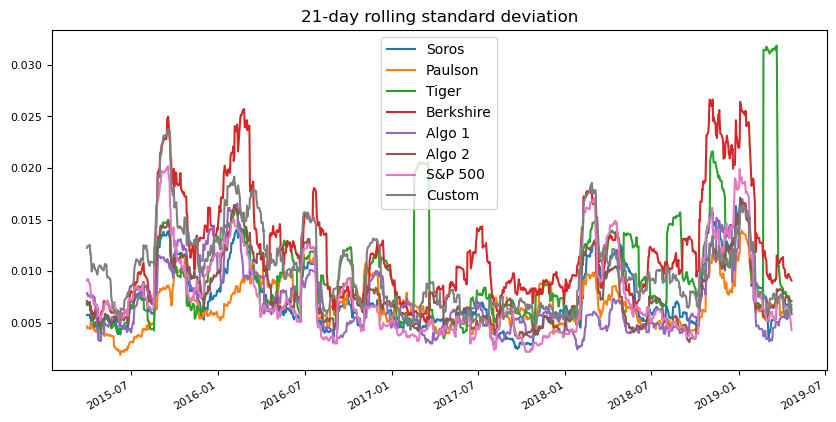

In [66]:
# Plot rolling standard deviation
roll21_sd_all.plot(figsize=(10,5), fontsize =8, title="21-day rolling standard deviation", legend = True)

### Calculate and plot the correlation

In [67]:
# Calculate the correlation
correlation_all = all_daily_returns.corr()
correlation_all

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,S&P 500,Custom
Soros,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574,0.637644
Paulson,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549,0.531897
Tiger,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505,0.428325
Berkshire,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856,0.529123
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963,0.247470
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192,0.682173
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000,0.011467
Custom,0.637644,0.531897,0.428325,0.529123,0.247470,0.682173,0.011467,1.000000


<AxesSubplot:>

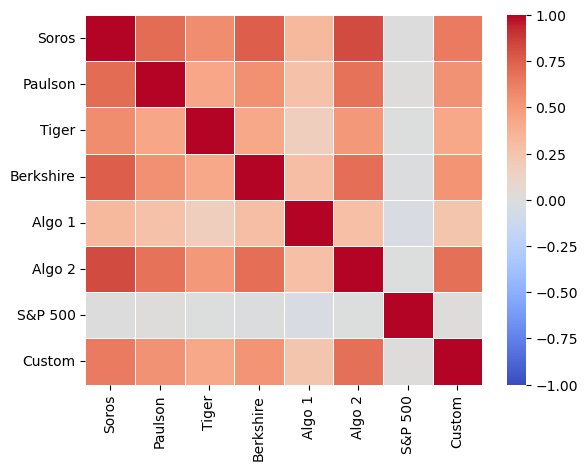

In [68]:
# Plot the correlation
sns.heatmap(correlation_all, vmin = -1, vmax= 1,cmap = "coolwarm", linewidth =0.5)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [69]:
# Calculate covariance between custom portfolio and S&P 500
roll60_custom_sp500_cov = all_daily_returns["Custom"].rolling(window = 60).cov(all_daily_returns["S&P 500"])
roll60_custom_sp500_cov.tail()

2019-04-15   -0.000002
2019-04-16   -0.000003
2019-04-17   -0.000004
2019-04-18   -0.000004
2019-04-22   -0.000004
dtype: float64

In [70]:
#Calculate rolling 60d beta for custom portfolio compared to the S&P500
roll60_custom_beta = roll60_custom_sp500_cov/ roll60_sp500_var
roll60_custom_beta.tail()

2019-04-15   -0.037601
2019-04-16   -0.091474
2019-04-17   -0.094581
2019-04-18   -0.094851
2019-04-22   -0.102148
dtype: float64

<AxesSubplot:title={'center':'Custom Portfolio: Rolling 60-Day Beta'}>

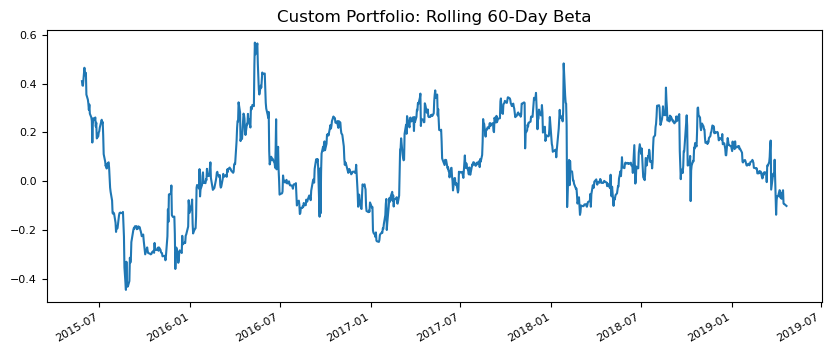

In [71]:
#Plot beta trend
roll60_custom_beta.plot(figsize = (10,4), fontsize = 8, title = "Custom Portfolio: Rolling 60-Day Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [72]:
# Calculate Annualized Sharpe Ratios
# sharpe_ratio = (Return(p) - risk free return)/ std_dev
# risk free rate was not provided. Assumption made: risk free rate  = 0 for the analysed period.
# shapre_ratio = Return(p) / std_dev

sharpe_ratios_all = all_daily_returns.mean()*252/ all_ann_std

In [73]:
sharpe_ratios_all.sort_values()

S&P 500     -0.518582
Paulson     -0.491422
Tiger       -0.130186
Soros        0.342894
Algo 2       0.484334
Custom       0.603102
Berkshire    0.606743
Algo 1       1.369589
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

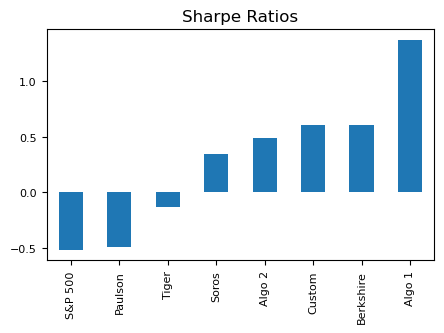

In [74]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.sort_values().plot.bar(figsize = (5,3), fontsize = 8, title= "Sharpe Ratios")

### How does your portfolio do?

My portfolio consists of three equally weighted stocks namely McDonald, BHP and Pfizer. <br>

For the investment period (2015-03-03 to 2019-04-22),<br>
**1. Compared to the market (S&P 500)** <br>
* **Return**: My portfolio has generated a higher cumulative return (43.5%) over the 4 years when compared to the market (a cumulative loss of 28%)
* **Sharpe Ratio**: My portfolio has a higher sharpe ratio (0.60) compared to the market (-0.52).
* **Volatility and Risk** :  My portfolio return is expected to be slightly more volatile compared to the market. With higher volatility, it is expected to be riskier than the market but my portfolio also provides a much higher risk adjusted return (sharpe ratio 0.60).
* **Correlation**: My portfolio and the market has no correlation (r<sup>2</sup> = 0.0115).

**2. Compared to the Algorithmic portfolios** <br>
* **Return**: My portfolio has generated return higher than Algorithmic portfolio 2 but lower than Algorthmic Portfolio 1. My portfolio cumulative return were 70% higher than Algorithmic Portfolio 2 and 53% lower than Algorithmic Portfolio 1.
* **Sharpe Ratio**: My portfolio risk adjusted return is slightly higher than Algorithmic Portfolio 2 but more than 50% lower than Algorithmic Portfolio 1.
* **Volatility and Risk** : My portfolio is riskier than both the Algorithmic portfolios.
* **Correlation** : My portfolio and Algorithmic portfolio 2 have a moderately positive correlation (r<sup>2</sup> = 0.6821). My portfolio and Algorithmic portfolio 1 have a low positive correlation(r<sup>2</sup> = 0.2475). 

**3. Compared to the whales portfolios** <br>
* **Return**: My portfolio cumulative returns were 43.5% over the 4 years; slightly lower than Berkshire Hathaway (53.3%) and significantly higher than other whales portfolio (Soros Fund Management LLC 15.3% and both Paulson & Co. Inc and Tiger Global Management LLC were generating negative returns).
* **Sharpe Ratio**: My portfolio risk adjusted return is similar to Berkshire Hathaway portfolio. Compared to other whales portfolio, my portfolio risk adjusted return is significantly higher. 
* **Volatility and Risk** : The observed volality in my portfolio return is higher than Soros Fund Management LLC and Paulson & Co. Inc but is less than those observed in Tiger Global Management LLC and Berskhire Hathaway.
* **Correlation** : My portfolio and all whale portfolios are moderately positive correlated (r<sup>2</sup> are in the range of 0.4 to 0.6).

**Conclusion**
For the period 2015-03-03  to 2019-04-22,
* My portfolio has outperformed the market (S&P 500).
* My portfolio has performed slightly better than the Algorithmic Portfolio 2 but has underperformed when compared to the Algorithmic Portfolio 1.
* My portfolio has underperformed when compared to Berkshire Hathaway portfolio but has outperformed other whale portfolios namely Soros Fund Management LLC, Paulson & Co. Inc and Tiger Global Management LLC.